In [72]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [73]:
df = pd.read_csv('../cleaning-preprocessing/cleaned_flight_data_with_target.csv')
df = df.astype(int)
# df = df[df['DEP_DELAY'] > 0]



6.747267428396521
0.18656313676157155
-0.49554575697178965


/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


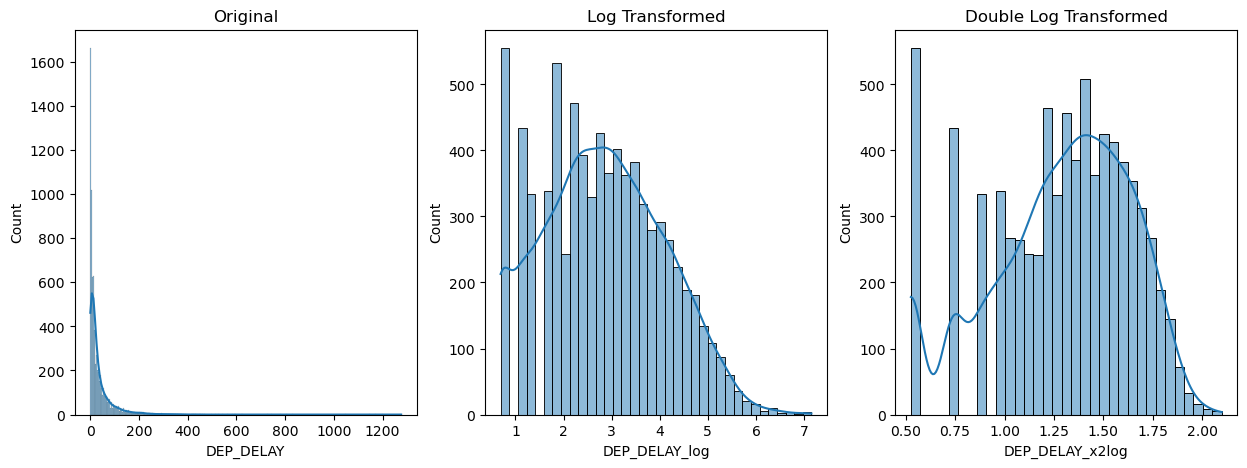

In [74]:
print(df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY'])  # log1p avoids log(0) issue
df['DEP_DELAY_x2log'] = np.log1p(df['DEP_DELAY_log'])

print(df['DEP_DELAY_log'].skew())
print(df['DEP_DELAY_x2log'].skew())

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1
df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])

# Graph
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['DEP_DELAY'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(df['DEP_DELAY_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

sns.histplot(df['DEP_DELAY_x2log'], kde=True, ax=axes[2])
axes[2].set_title('Double Log Transformed')

plt.show()

6.747267428396521
1.9134508498705332
1.1102301566167692
0.019062682996326904


/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


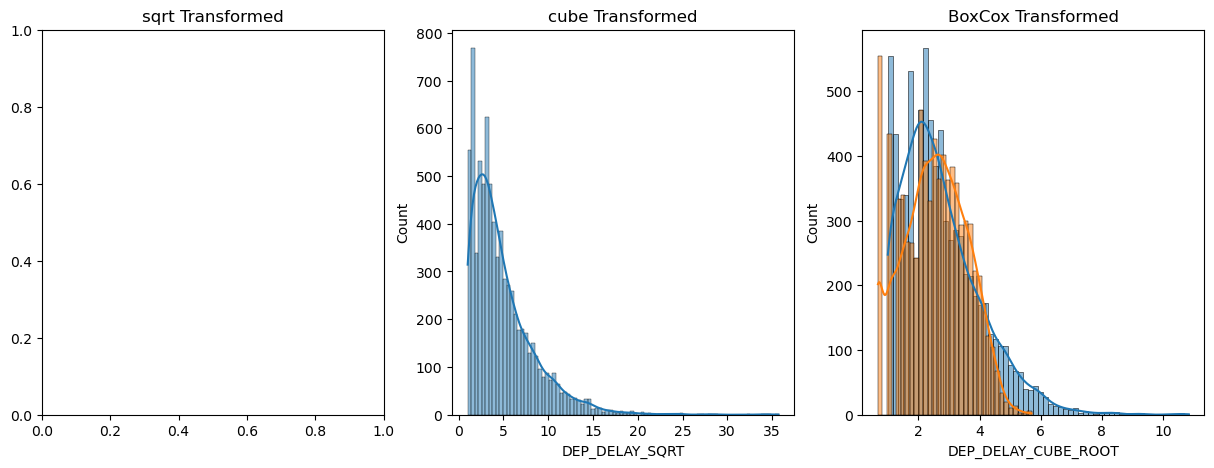

In [75]:
print(df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1
# df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])


df['DEP_DELAY_SQRT'] = np.sqrt(df['DEP_DELAY_shifted'])
df['DEP_DELAY_CUBE_ROOT'] = np.cbrt(df['DEP_DELAY_shifted'])

from scipy.stats import boxcox
df['DEP_DELAY_BOXCOX'], lambda_ = boxcox(df['DEP_DELAY_shifted'] + 1)  # Adding 1 to avoid issues with 0


print(df['DEP_DELAY_SQRT'].skew())
print(df['DEP_DELAY_CUBE_ROOT'].skew())
print(df['DEP_DELAY_BOXCOX'].skew())

# Graph

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['DEP_DELAY_SQRT'], kde=True, ax=axes[1])
axes[0].set_title('sqrt Transformed')

sns.histplot(df['DEP_DELAY_CUBE_ROOT'], kde=True, ax=axes[2])
axes[1].set_title('cube Transformed')

sns.histplot(df['DEP_DELAY_BOXCOX'], kde=True, ax=axes[2])
axes[2].set_title('BoxCox Transformed')

plt.show()


In [76]:
# X = df.drop(columns=['DEP_DELAY_log','DEP_DELAY','DEP_DELAY_shifted', 'CRS_DEP_M','Wind Speed','MONTH','CRS_ARR_M', 'DAY_OF_MONTH','Wind Gust', 'Pressure','Condition_Light Snow / Windy', 'Condition_Rain', 'OP_UNIQUE_CARRIER_MQ', 'DEST_LAX', 'Temperature', 'Condition_Mostly Cloudy', 'Condition_Heavy Rain'])  # Feature matrix
X = df.drop(columns=['DEP_DELAY_log', 'DEP_DELAY','DEP_DELAY_shifted', 'DEP_DELAY_sqrt']) #Dropping DEP_DELAY Log/Sqrt transform cols
y = df['DEP_DELAY_log']  # Target variable

KeyError: "['DEP_DELAY_sqrt'] not found in axis"

In [ ]:
X['sch_dep_log'] = np.log1p(X['sch_dep'])  #Top1 Feature 
X['DISTANCE_log'] = np.log1p(X['DISTANCE'])  #Top2 Feature
X['CRS_ELAPSED_TIME_log'] = np.log1p(X['CRS_ELAPSED_TIME'])  #Top3 Feature

X['OP_UNIQUE_CARRIER_DL_log'] = np.log1p(X['OP_UNIQUE_CARRIER_DL'])  #Top4  Feature
X['Wind_Speed_log'] = np.log1p(X['Wind Speed'])  #Top5  Feature
X['CRS_DEP_M_log'] = np.log1p(X['CRS_DEP_M']) #Top6  Feature

X['Pressure_log'] = np.log1p(X['Pressure']) #Top7  Feature
X['OP_UNIQUE_CARRIER_MQ_log'] = np.log1p(X['OP_UNIQUE_CARRIER_MQ'])  #Top8  Feature
X['OP_UNIQUE_CARRIER_B6_log'] = np.log1p(X['OP_UNIQUE_CARRIER_B6'])  #Top9  Feature

X['Condition_Cloudy / Windy_log'] = np.log1p(X['Condition_Cloudy / Windy'])  #Top10  Feature
X['DEST_BWI_log'] = np.log1p(X['DEST_BWI'])  #Top11  Feature
X['DEST_BUF_log'] = np.log1p(X['DEST_BUF'])  #Top12  Feature

X['DEST_BTV_log'] = np.log1p(X['DEST_BTV'])  #Top13  Feature
X['DEST_LAX_log'] = np.log1p(X['DEST_LAX'])  #Top14  Feature
X['DEST_BOS_log'] = np.log1p(X['DEST_BOS'])  #Top15  Feature

# X = X.drop(columns=['sch_dep', 'DISTANCE', 'CRS_ELAPSED_TIME', 
#                     'OP_UNIQUE_CARRIER_DL', 'Wind Speed', 'CRS_DEP_M',
#                     'Pressure', 'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_B6', 
#                     'Condition_Cloudy / Windy', 'DEST_BWI', 'DEST_BUF',
#                     'DEST_BTV', 'DEST_LAX', 'DEST_BOS'
#                     ])



In [ ]:
X['sch_dep_log']

2        2.302585
9        2.890372
14       2.890372
26       3.433987
30       3.433987
           ...   
28811    3.044522
28815    3.044522
28816    2.995732
28817    2.995732
28818    2.995732
Name: sch_dep_log, Length: 7805, dtype: float64

/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Log Transformed')

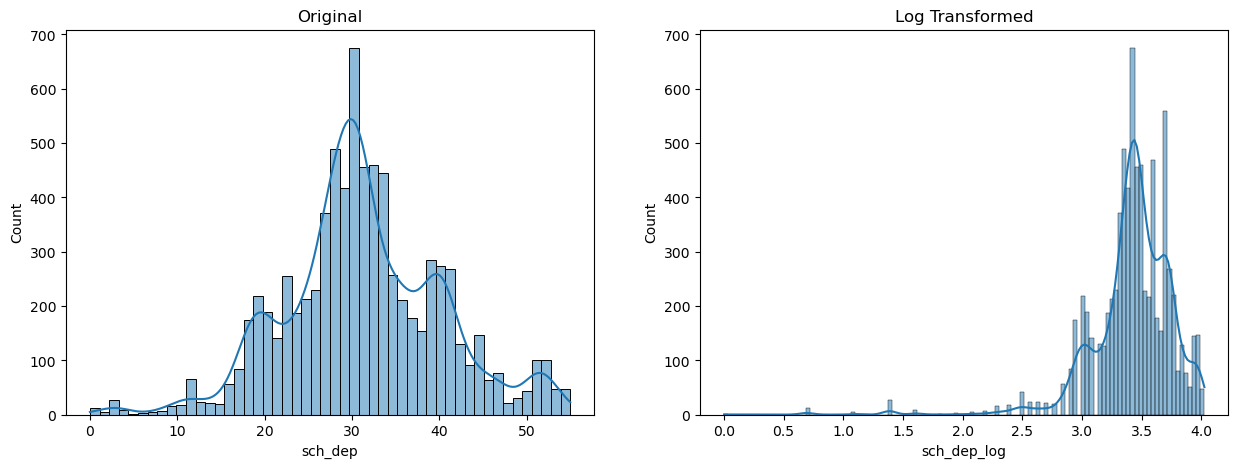

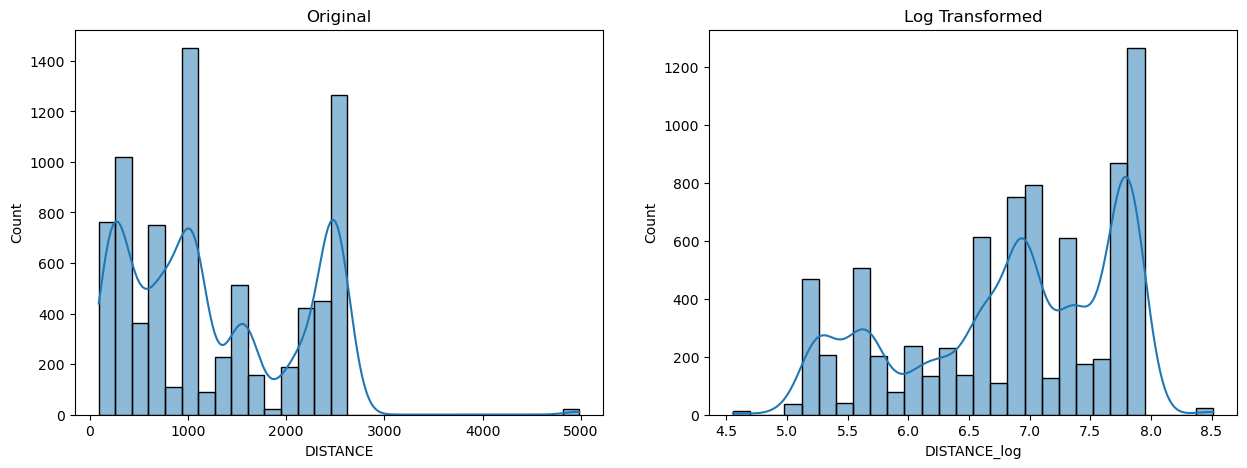

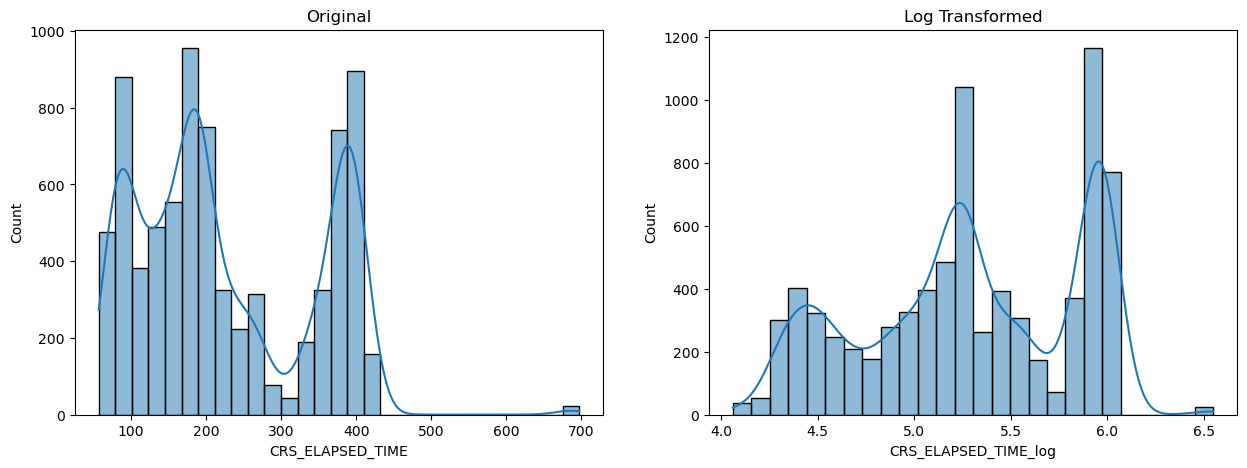

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['sch_dep'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['sch_dep_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['DISTANCE'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['DISTANCE_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['CRS_ELAPSED_TIME'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['CRS_ELAPSED_TIME_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Log Transformed')

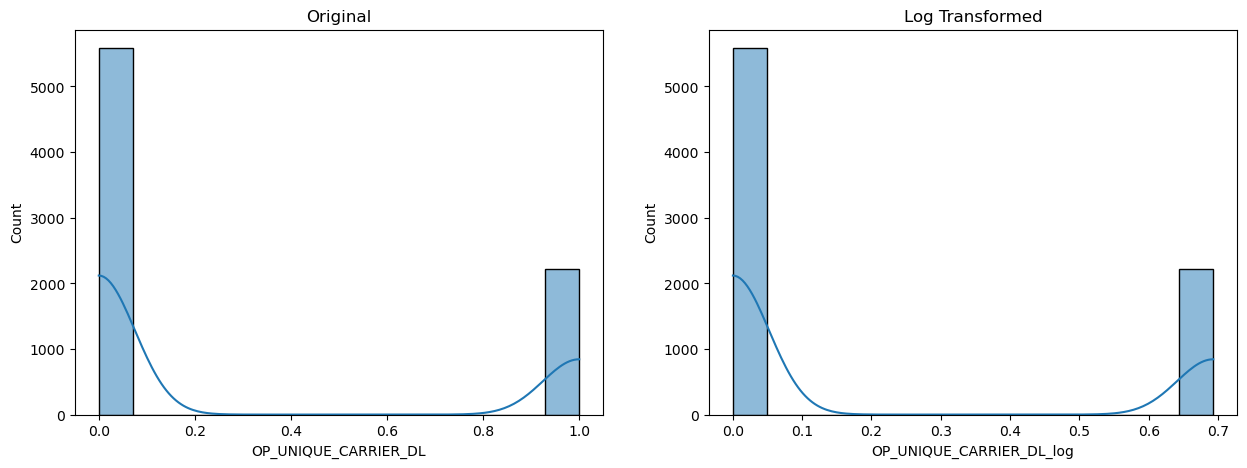

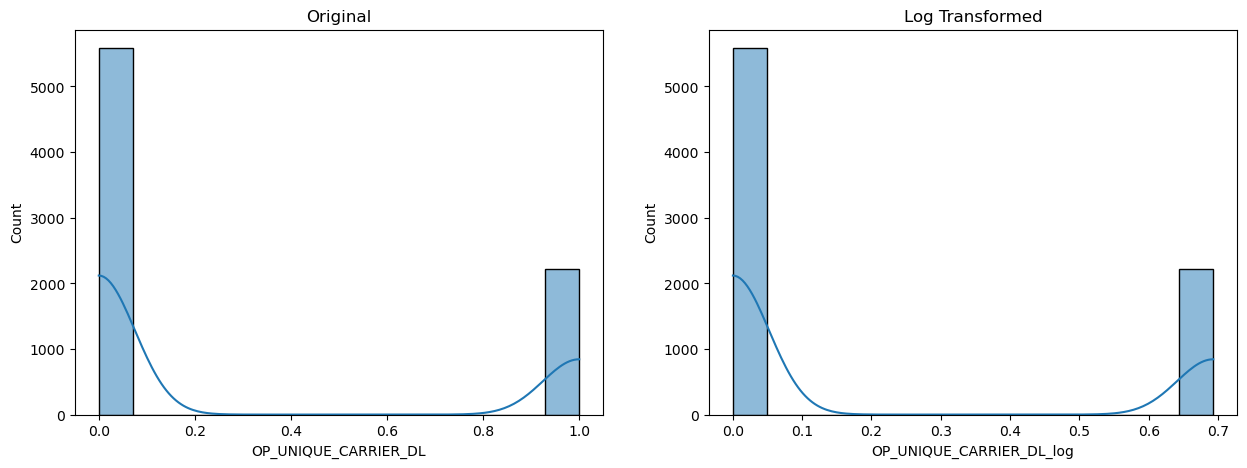

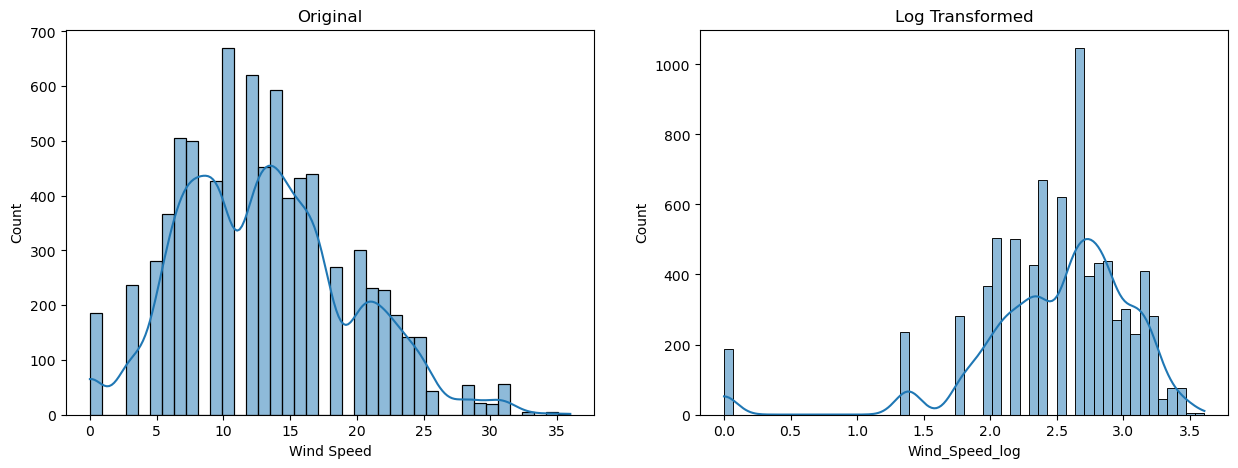

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['OP_UNIQUE_CARRIER_DL'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['OP_UNIQUE_CARRIER_DL_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['OP_UNIQUE_CARRIER_DL'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['OP_UNIQUE_CARRIER_DL_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')



fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['Wind Speed'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['Wind_Speed_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Log Transformed')

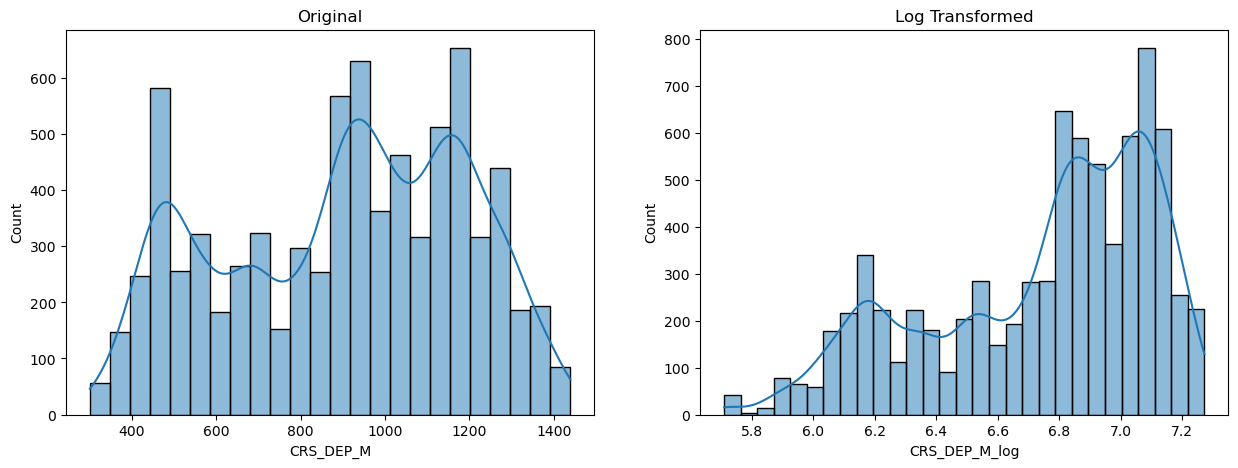

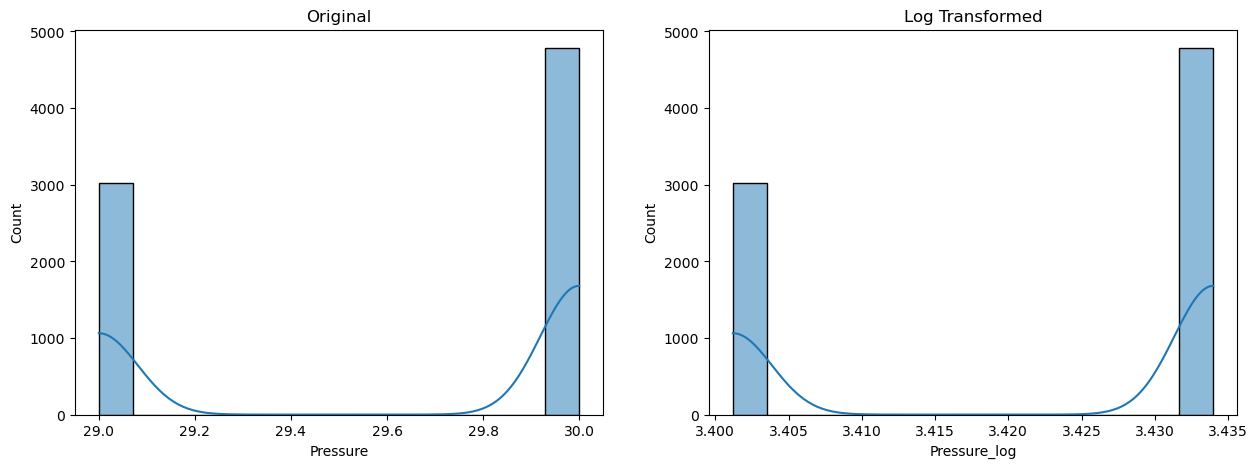

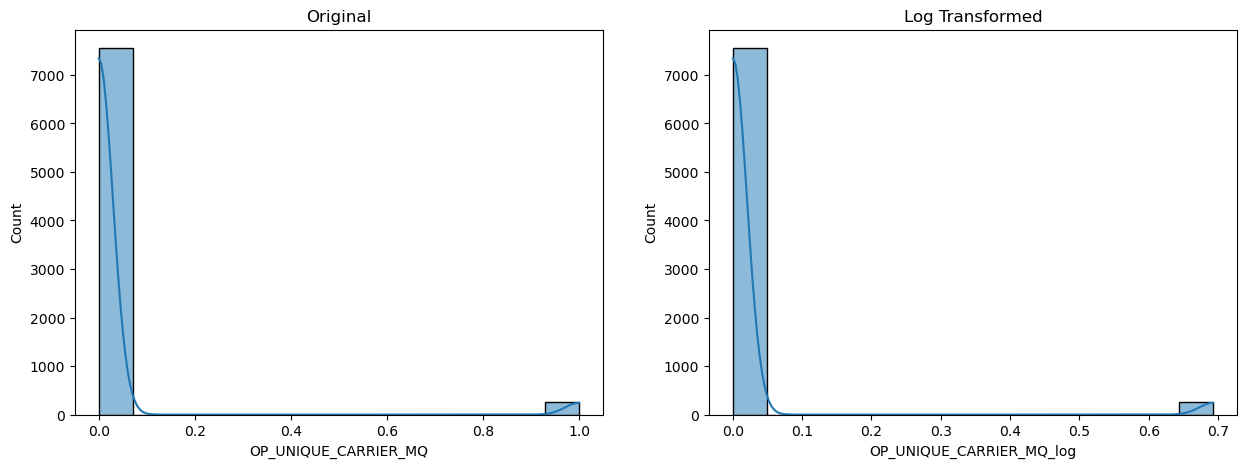

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['CRS_DEP_M'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['CRS_DEP_M_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')



fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['Pressure'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['Pressure_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')



fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X['OP_UNIQUE_CARRIER_MQ'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(X['OP_UNIQUE_CARRIER_MQ_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Log Transformed')

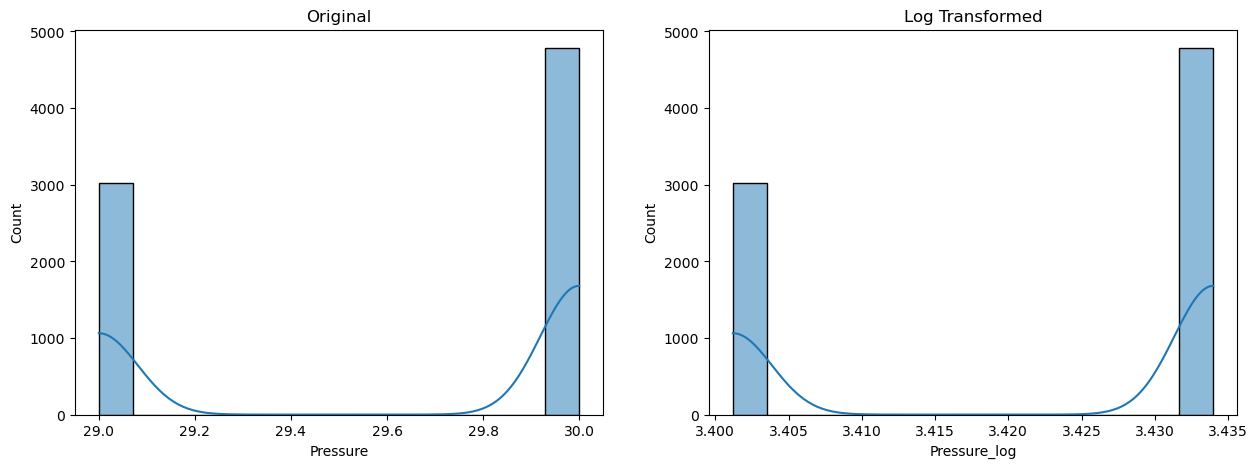

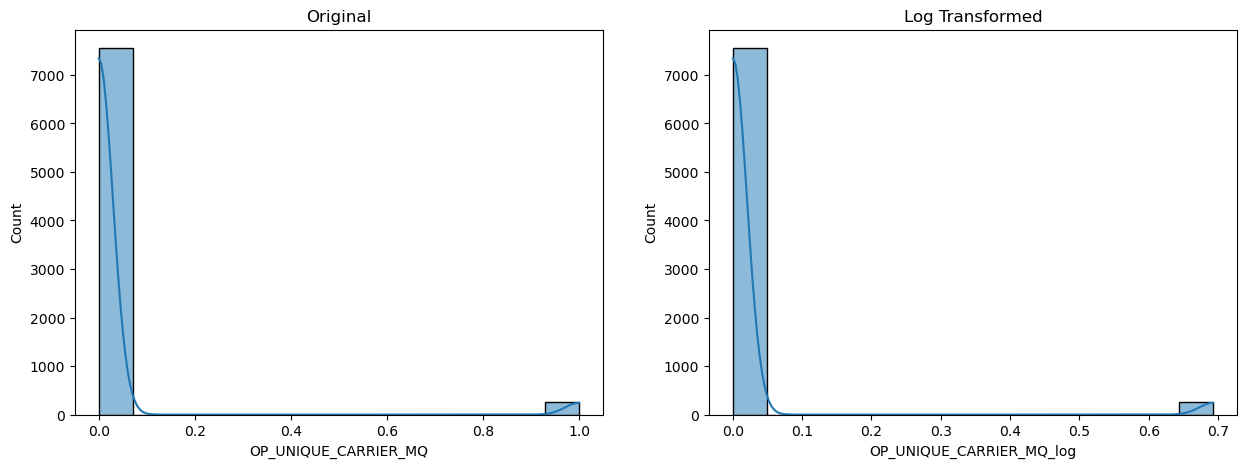